Using the code from the validation accuracy, we test drop out with the optimised parameters

In [31]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils import data
import random
import copy
# no drop out was implemented but the hyperparamters were added
# from randimisation of hyperparamters
class TunedParamters(nn.Module):
  def __init__(self, input_size):
    super(TunedParamters, self).__init__()
    self.dropout = nn.Dropout(0.1)
    self.fc1 = nn.Linear(input_size, 32)
    self.fc2 = nn.Linear(32, 64)
    self.fc3 = nn.Linear(64, 32)
    self.fc4 = nn.Linear(32, 3)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = self.fc4(x)
    return x
# Hyperparameters
learning_rate = 0.001
batch_size = 16
epochs = 200

TrainingLoss = []
TrainingAccuracy = []
ValidationLoss = []
ValidationAccuracy = []

# Split the original Dataset into 3
TestingData = open('Testing.csv','r').read().split("\n")[1:]
TrainingData = open('Training.csv','r').read().split("\n")[1:]
ValidationData = open('Validation.csv','r').read().split("\n")[1:]

input_size  = len(TestingData[0].split(",")) - 1

model = TunedParamters(input_size)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()  # Cross Entropy Loss is apparently better for classification than MSE
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def process_data(data):
    features = []
    labels = []

    for line in data:
        if line.strip():
            split_line = list(map(float, line.split(',')))
            features.append(split_line[:-1])  # All except last column
            labels.append(int(split_line[-1]))

    return torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.long)

train_features, train_labels = process_data(TrainingData)
valid_features, valid_labels = process_data(ValidationData)
test_features, test_labels = process_data(TestingData)

train_dataset = data.TensorDataset(train_features, train_labels)
train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training Loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()
        # Forward pass
        outputs = model(batch_features)

        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')
    TrainingLoss.append(running_loss/ len(train_loader))

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
      valid_outputs = model(valid_features)
      valid_loss = criterion(valid_outputs, valid_labels)
      print(f'Validation Loss after epoch {epoch + 1}: {valid_loss.item():.4f}')
      ValidationLoss.append(valid_loss.item())
      predicted_classes = torch.argmax(valid_outputs, dim=1)
      # Accuracy calculation
      accuracy = (predicted_classes == valid_labels).float().mean()
      ValidationAccuracy.append(accuracy.item())
      print(f'Validation Accuracy after epoch {epoch + 1}: {accuracy.item() * 100:.2f}%')

      # Collecting testing accuracy for plotting purposes
      train_outputs = model(train_features)
      train_loss = criterion(train_outputs, train_labels)
      predicted_classes = torch.argmax(train_outputs, dim=1)
      accuracy = (predicted_classes == train_labels).float().mean()
      TrainingAccuracy.append(accuracy.item())

# Save the model
torch.save(model.state_dict(), 'tuned_model.pth')



Epoch [1/200], Loss: 2.7969
Validation Loss after epoch 1: 5.9592
Validation Accuracy after epoch 1: 25.74%
Epoch [2/200], Loss: 1.3462
Validation Loss after epoch 2: 1.7754
Validation Accuracy after epoch 2: 28.50%
Epoch [3/200], Loss: 1.1518
Validation Loss after epoch 3: 1.5721
Validation Accuracy after epoch 3: 27.93%
Epoch [4/200], Loss: 0.9894
Validation Loss after epoch 4: 1.4340
Validation Accuracy after epoch 4: 29.20%
Epoch [5/200], Loss: 0.9034
Validation Loss after epoch 5: 0.9001
Validation Accuracy after epoch 5: 56.90%
Epoch [6/200], Loss: 0.8524
Validation Loss after epoch 6: 1.0124
Validation Accuracy after epoch 6: 55.90%
Epoch [7/200], Loss: 0.8030
Validation Loss after epoch 7: 1.3217
Validation Accuracy after epoch 7: 35.17%
Epoch [8/200], Loss: 0.7693
Validation Loss after epoch 8: 1.3378
Validation Accuracy after epoch 8: 36.28%
Epoch [9/200], Loss: 0.7487
Validation Loss after epoch 9: 0.9124
Validation Accuracy after epoch 9: 55.20%
Epoch [10/200], Loss: 0.7285

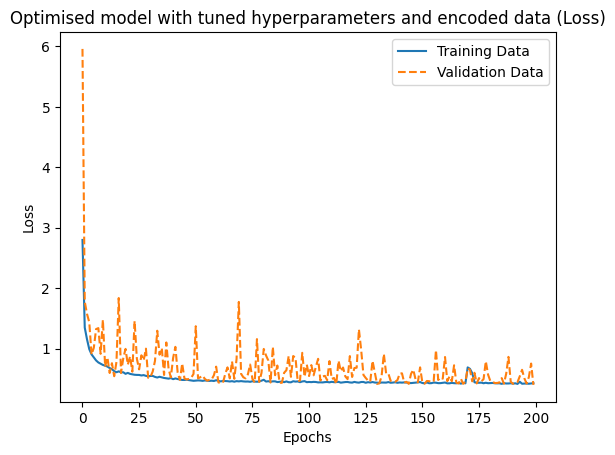

In [32]:
import matplotlib.pyplot as plt
plt.plot(TrainingLoss, color='C0',label='Training Data')
plt.plot(ValidationLoss, color='C1',label='Validation Data',linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Optimised model with tuned hyperparameters and encoded data (Loss)")
plt.show()

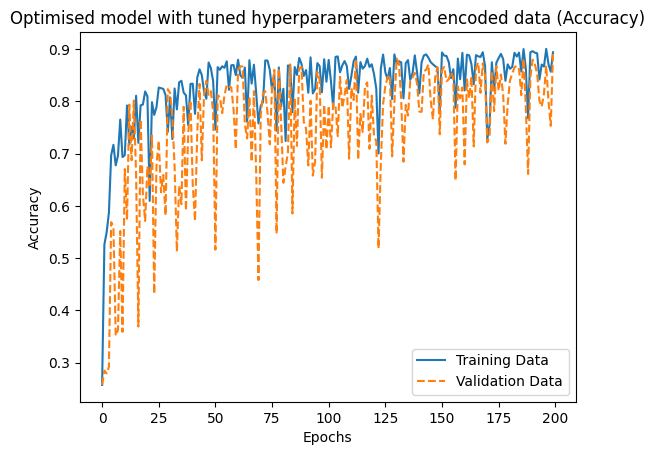

In [33]:
plt.plot(TrainingAccuracy, color='C0',label='Training Data')
plt.plot(ValidationAccuracy, color='C1',label='Validation Data',linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Optimised model with tuned hyperparameters and encoded data (Accuracy)")
plt.show()

## Dropout implemented

# Dropout added between each hidden layer 

In [36]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils import data
import random
import copy

class TunedParamters(nn.Module):
  def __init__(self, input_size):
    super(TunedParamters, self).__init__()
    self.dropout = nn.Dropout(0.1)
    self.fc1 = nn.Linear(input_size, 32)
    self.fc2 = nn.Linear(32, 64)
    self.fc3 = nn.Linear(64, 32)
    self.fc4 = nn.Linear(32, 3)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = self.dropout(x)
    x = torch.relu(self.fc2(x))
    x = self.dropout(x)
    x = torch.relu(self.fc3(x))
    x = self.dropout(x)
    x = self.fc4(x)
    return x
  # Hyperparameters
learning_rate = 0.001
batch_size = 16
epochs = 200

TrainingLoss = []
TrainingAccuracy = []
ValidationLoss = []
ValidationAccuracy = []

# Split the original Dataset into 3
TestingData = open('Testing.csv','r').read().split("\n")[1:]
TrainingData = open('Training.csv','r').read().split("\n")[1:]
ValidationData = open('Validation.csv','r').read().split("\n")[1:]

input_size  = len(TestingData[0].split(",")) - 1

model = TunedParamters(input_size)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()  # Cross Entropy Loss is apparently better for classification than MSE
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def process_data(data):
    features = []
    labels = []

    for line in data:
        if line.strip():
            split_line = list(map(float, line.split(',')))
            features.append(split_line[:-1])  # All except last column
            labels.append(int(split_line[-1]))

    return torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.long)

train_features, train_labels = process_data(TrainingData)
valid_features, valid_labels = process_data(ValidationData)
test_features, test_labels = process_data(TestingData)

train_dataset = data.TensorDataset(train_features, train_labels)
train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training Loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()
        # Forward pass
        outputs = model(batch_features)

        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')
    TrainingLoss.append(running_loss/ len(train_loader))

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
      valid_outputs = model(valid_features)
      valid_loss = criterion(valid_outputs, valid_labels)
      print(f'Validation Loss after epoch {epoch + 1}: {valid_loss.item():.4f}')
      ValidationLoss.append(valid_loss.item())
      predicted_classes = torch.argmax(valid_outputs, dim=1)
      # Accuracy calculation
      accuracy = (predicted_classes == valid_labels).float().mean()
      ValidationAccuracy.append(accuracy.item())
      print(f'Validation Accuracy after epoch {epoch + 1}: {accuracy.item() * 100:.2f}%')

      # Collecting testing accuracy for plotting purposes
      train_outputs = model(train_features)
      train_loss = criterion(train_outputs, train_labels)
      predicted_classes = torch.argmax(train_outputs, dim=1)
      accuracy = (predicted_classes == train_labels).float().mean()
      TrainingAccuracy.append(accuracy.item())

# Save the model
torch.save(model.state_dict(), 'dropoutmodel_model.pth')



Epoch [1/200], Loss: 9.1704
Validation Loss after epoch 1: 1.0510
Validation Accuracy after epoch 1: 48.66%
Epoch [2/200], Loss: 1.1143
Validation Loss after epoch 2: 1.0488
Validation Accuracy after epoch 2: 48.66%
Epoch [3/200], Loss: 1.0598
Validation Loss after epoch 3: 1.0486
Validation Accuracy after epoch 3: 48.66%
Epoch [4/200], Loss: 1.0675
Validation Loss after epoch 4: 1.0486
Validation Accuracy after epoch 4: 48.66%
Epoch [5/200], Loss: 1.0531
Validation Loss after epoch 5: 1.0487
Validation Accuracy after epoch 5: 48.66%
Epoch [6/200], Loss: 1.0527
Validation Loss after epoch 6: 1.0487
Validation Accuracy after epoch 6: 48.66%
Epoch [7/200], Loss: 1.0515
Validation Loss after epoch 7: 1.0487
Validation Accuracy after epoch 7: 48.66%
Epoch [8/200], Loss: 1.0512
Validation Loss after epoch 8: 1.0487
Validation Accuracy after epoch 8: 48.66%
Epoch [9/200], Loss: 1.0511
Validation Loss after epoch 9: 1.0487
Validation Accuracy after epoch 9: 48.66%
Epoch [10/200], Loss: 1.0505

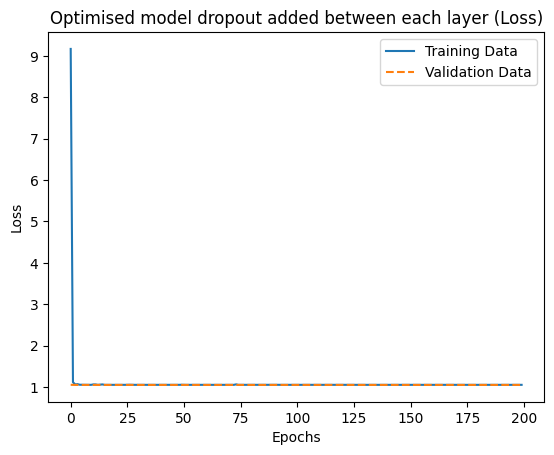

In [37]:
plt.plot(TrainingLoss, color='C0',label='Training Data')
plt.plot(ValidationLoss, color='C1',label='Validation Data',linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Optimised model dropout added between each layer (Loss)")
plt.legend()
plt.show()

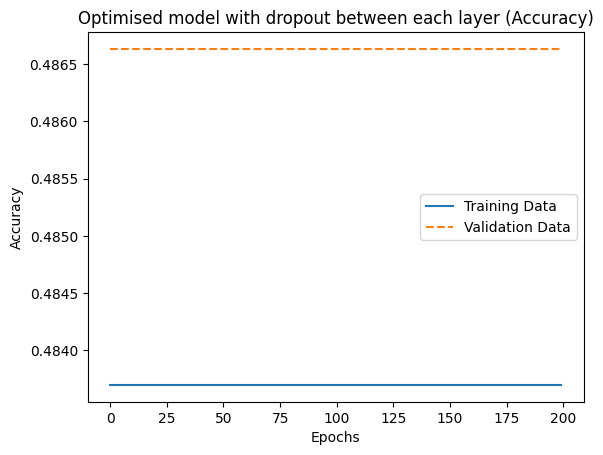

In [38]:
plt.plot(TrainingAccuracy, color='C0',label='Training Data')
plt.plot(ValidationAccuracy, color='C1',label='Validation Data',linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Optimised model with dropout between each layer (Accuracy)")
plt.legend()
plt.show()

# Drop out before input level 

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils import data
import random
import copy
# no drop out was implemented but the hyperparamters were added
# from randimisation of hyperparamters
class TunedParamters(nn.Module):
  def __init__(self, input_size):
    super(TunedParamters, self).__init__()
    self.dropout = nn.Dropout(0.1)
    self.fc1 = nn.Linear(input_size, 32)
    self.fc2 = nn.Linear(32, 64)
    self.fc3 = nn.Linear(64, 32)
    self.fc4 = nn.Linear(32, 3)


  def forward(self, x):
    x = self.dropout(x)
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = self.fc4(x)
    return x
  # Hyperparameters
learning_rate = 0.001
batch_size = 16
epochs = 200


TrainingLoss = []
TrainingAccuracy = []
ValidationLoss = []
ValidationAccuracy = []

# Split the original Dataset into 3
TestingData = open('Testing.csv','r').read().split("\n")[1:]
TrainingData = open('Training.csv','r').read().split("\n")[1:]
ValidationData = open('Validation.csv','r').read().split("\n")[1:]

input_size  = len(TestingData[0].split(",")) - 1

model = TunedParamters(input_size)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()  # Cross Entropy Loss is apparently better for classification than MSE
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def process_data(data):
    features = []
    labels = []

    for line in data:
        if line.strip():
            split_line = list(map(float, line.split(',')))
            features.append(split_line[:-1])  # All except last column
            labels.append(int(split_line[-1]))

    return torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.long)

train_features, train_labels = process_data(TrainingData)
valid_features, valid_labels = process_data(ValidationData)
test_features, test_labels = process_data(TestingData)

train_dataset = data.TensorDataset(train_features, train_labels)
train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training Loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()
        # Forward pass
        outputs = model(batch_features)

        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')
    TrainingLoss.append(running_loss/ len(train_loader))

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
      valid_outputs = model(valid_features)
      valid_loss = criterion(valid_outputs, valid_labels)
      print(f'Validation Loss after epoch {epoch + 1}: {valid_loss.item():.4f}')
      ValidationLoss.append(valid_loss.item())
      predicted_classes = torch.argmax(valid_outputs, dim=1)
      # Accuracy calculation
      accuracy = (predicted_classes == valid_labels).float().mean()
      ValidationAccuracy.append(accuracy.item())
      print(f'Validation Accuracy after epoch {epoch + 1}: {accuracy.item() * 100:.2f}%')

      # Collecting testing accuracy for plotting purposes
      train_outputs = model(train_features)
      train_loss = criterion(train_outputs, train_labels)
      predicted_classes = torch.argmax(train_outputs, dim=1)
      accuracy = (predicted_classes == train_labels).float().mean()
      TrainingAccuracy.append(accuracy.item())

# Save the model
torch.save(model.state_dict(), 'dropoutmodel_model.pth')



Epoch [1/200], Loss: 5.5957
Validation Loss after epoch 1: 4.0226
Validation Accuracy after epoch 1: 25.60%
Epoch [2/200], Loss: 2.0439
Validation Loss after epoch 2: 2.5560
Validation Accuracy after epoch 2: 48.66%
Epoch [3/200], Loss: 1.4426
Validation Loss after epoch 3: 1.4462
Validation Accuracy after epoch 3: 49.13%
Epoch [4/200], Loss: 1.2285
Validation Loss after epoch 4: 1.5098
Validation Accuracy after epoch 4: 53.09%
Epoch [5/200], Loss: 1.1090
Validation Loss after epoch 5: 1.0872
Validation Accuracy after epoch 5: 48.66%
Epoch [6/200], Loss: 1.0288
Validation Loss after epoch 6: 1.0757
Validation Accuracy after epoch 6: 58.46%
Epoch [7/200], Loss: 0.9863
Validation Loss after epoch 7: 1.0063
Validation Accuracy after epoch 7: 48.66%
Epoch [8/200], Loss: 0.9621
Validation Loss after epoch 8: 0.9682
Validation Accuracy after epoch 8: 48.70%
Epoch [9/200], Loss: 0.9631
Validation Loss after epoch 9: 1.0467
Validation Accuracy after epoch 9: 49.34%
Epoch [10/200], Loss: 0.9609

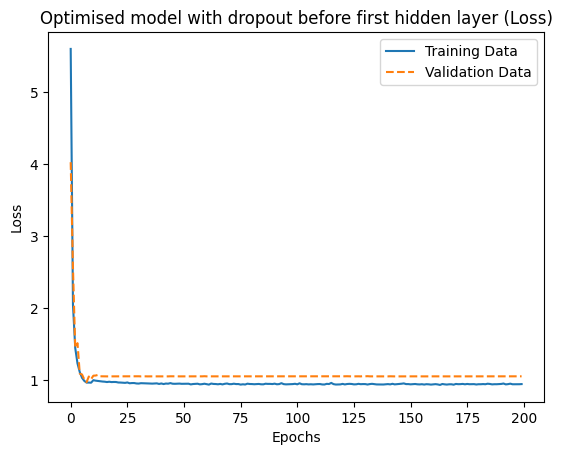

In [40]:
plt.plot(TrainingLoss, color='C0',label='Training Data')
plt.plot(ValidationLoss, color='C1',label='Validation Data',linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Optimised model with dropout before first hidden layer (Loss)")
plt.legend()
plt.show()

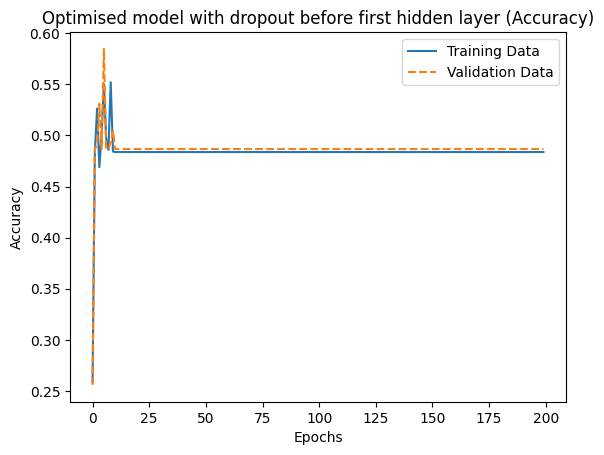

In [41]:
plt.plot(TrainingAccuracy, color='C0',label='Training Data')
plt.plot(ValidationAccuracy, color='C1',label='Validation Data',linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Optimised model with dropout before first hidden layer (Accuracy)")
plt.legend()
plt.show()

# Dropout after last hidden layer 

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils import data
import random
import copy
# no drop out was implemented but the hyperparamters were added
# from randimisation of hyperparamters
class TunedParamters(nn.Module):
  def __init__(self, input_size):
    super(TunedParamters, self).__init__()
    self.dropout = nn.Dropout(0.1)
    self.fc1 = nn.Linear(input_size, 32)
    self.fc2 = nn.Linear(32, 64)
    self.fc3 = nn.Linear(64, 32)
    self.fc4 = nn.Linear(32, 3)

  def forward(self, x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.relu(self.fc3(x))
    x = self.dropout(x)
    x = self.fc4(x)
    return x

# Hyperparameters
learning_rate = 0.001
batch_size = 16
epochs = 200


TrainingLoss = []
TrainingAccuracy = []
ValidationLoss = []
ValidationAccuracy = []

# Split the original Dataset into 3
TestingData = open('Testing.csv','r').read().split("\n")[1:]
TrainingData = open('Training.csv','r').read().split("\n")[1:]
ValidationData = open('Validation.csv','r').read().split("\n")[1:]

input_size  = len(TestingData[0].split(",")) - 1

model = TunedParamters(input_size)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()  # Cross Entropy Loss is apparently better for classification than MSE
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

def process_data(data):
    features = []
    labels = []

    for line in data:
        if line.strip():
            split_line = list(map(float, line.split(',')))
            features.append(split_line[:-1])  # All except last column
            labels.append(int(split_line[-1]))

    return torch.tensor(features, dtype=torch.float32), torch.tensor(labels, dtype=torch.long)

train_features, train_labels = process_data(TrainingData)
valid_features, valid_labels = process_data(ValidationData)
test_features, test_labels = process_data(TestingData)

train_dataset = data.TensorDataset(train_features, train_labels)
train_loader = data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Training Loop
for epoch in range(epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for batch_features, batch_labels in train_loader:
        optimizer.zero_grad()
        # Forward pass
        outputs = model(batch_features)

        loss = criterion(outputs, batch_labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')
    TrainingLoss.append(running_loss/ len(train_loader))

    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
      valid_outputs = model(valid_features)
      valid_loss = criterion(valid_outputs, valid_labels)
      print(f'Validation Loss after epoch {epoch + 1}: {valid_loss.item():.4f}')
      ValidationLoss.append(valid_loss.item())
      predicted_classes = torch.argmax(valid_outputs, dim=1)
      # Accuracy calculation
      accuracy = (predicted_classes == valid_labels).float().mean()
      ValidationAccuracy.append(accuracy.item())
      print(f'Validation Accuracy after epoch {epoch + 1}: {accuracy.item() * 100:.2f}%')

      # Collecting testing accuracy for plotting purposes
      train_outputs = model(train_features)
      train_loss = criterion(train_outputs, train_labels)
      predicted_classes = torch.argmax(train_outputs, dim=1)
      accuracy = (predicted_classes == train_labels).float().mean()
      TrainingAccuracy.append(accuracy.item())

# Save the model
torch.save(model.state_dict(), 'dropoutmodel_model.pth')



Epoch [1/200], Loss: 3.3695
Validation Loss after epoch 1: 1.0497
Validation Accuracy after epoch 1: 48.66%
Epoch [2/200], Loss: 1.0509
Validation Loss after epoch 2: 1.0487
Validation Accuracy after epoch 2: 48.66%
Epoch [3/200], Loss: 1.0508
Validation Loss after epoch 3: 1.0487
Validation Accuracy after epoch 3: 48.66%
Epoch [4/200], Loss: 1.0506
Validation Loss after epoch 4: 1.0487
Validation Accuracy after epoch 4: 48.66%
Epoch [5/200], Loss: 1.0507
Validation Loss after epoch 5: 1.0486
Validation Accuracy after epoch 5: 48.66%
Epoch [6/200], Loss: 1.0505
Validation Loss after epoch 6: 1.0486
Validation Accuracy after epoch 6: 48.66%
Epoch [7/200], Loss: 1.0505
Validation Loss after epoch 7: 1.0487
Validation Accuracy after epoch 7: 48.66%
Epoch [8/200], Loss: 1.0506
Validation Loss after epoch 8: 1.0487
Validation Accuracy after epoch 8: 48.66%
Epoch [9/200], Loss: 1.0507
Validation Loss after epoch 9: 1.0486
Validation Accuracy after epoch 9: 48.66%
Epoch [10/200], Loss: 1.0506

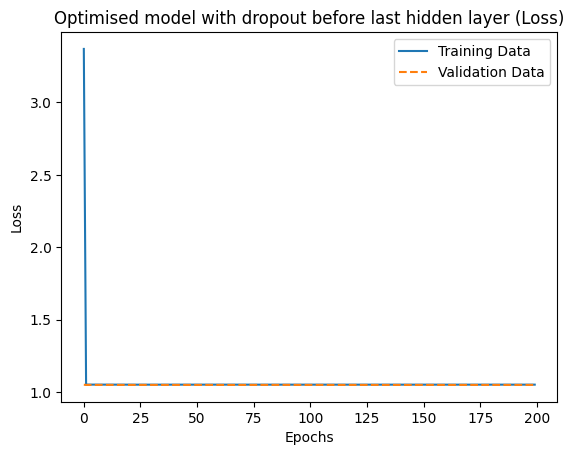

In [43]:
plt.plot(TrainingLoss, color='C0',label='Training Data')
plt.plot(ValidationLoss, color='C1',label='Validation Data',linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Optimised model with dropout before last hidden layer (Loss)")
plt.legend()
plt.show()

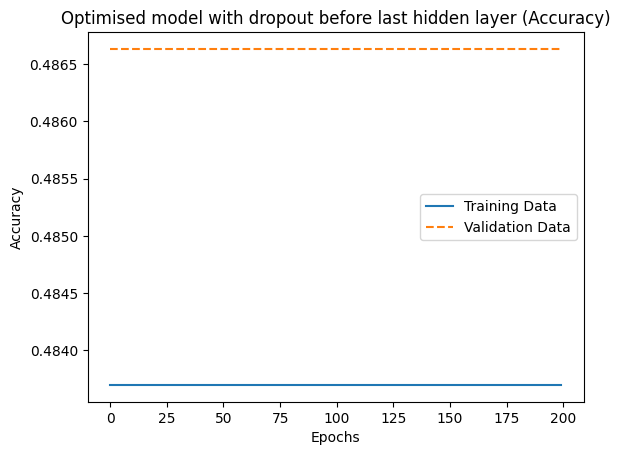

In [44]:
plt.plot(TrainingAccuracy, color='C0',label='Training Data')
plt.plot(ValidationAccuracy, color='C1',label='Validation Data',linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Optimised model with dropout before last hidden layer (Accuracy)")
plt.legend()
plt.show()